# Imports and Data Frame Creation

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import seaborn as sns


In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')

# '?' Entered into Data

In [3]:
for col in df.describe().columns:
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index
    df.loc[nanidx, col] = '?'

# Understanding the Data

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.describe()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,101751,71474,6,3,10,10,9,27,18,15,...,1,4,4,2,2,2,2,2,2,3
top,?,?,Caucasian,Female,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,Yes,NO
freq,16,85,76099,54708,26068,98569,53980,60187,57462,17750,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null object
patient_nbr                 101766 non-null object
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null object
discharge_disposition_id    101766 non-null object
admission_source_id         101766 non-null object
time_in_hospital            101766 non-null object
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null object
num_procedures              101766 non-null object
num_medications             101766 non-null object
number_outpatient           101766 non-null object
number_emergency            101766 non-null object
number_inpatient      

In [7]:
df.weight.value_counts()

?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [8]:
for col in list(df.columns):
    print(df.loc[df[col] == '?'])

      encounter_id patient_nbr             race  gender      age weight  \
1255             ?      695439        Caucasian    Male  [70-80)      ?   
20005            ?      140355  AfricanAmerican  Female  [50-60)      ?   
29496            ?    23628231        Caucasian  Female  [50-60)      ?   
32142            ?    24689169        Caucasian    Male  [60-70)      ?   
33501            ?    23402079  AfricanAmerican  Female  [40-50)      ?   
34244            ?    91153611        Caucasian  Female  [70-80)      ?   
34514            ?    23448636        Caucasian  Female  [60-70)      ?   
37960            ?    31553892        Caucasian  Female  [50-60)      ?   
49890            ?   103228398         Hispanic  Female  [20-30)      ?   
53948            ?    95114097        Caucasian  Female  [70-80)      ?   
59147            ?   103317156  AfricanAmerican  Female  [60-70)      ?   
59735            ?    59296194        Caucasian  Female  [50-60)      ?   
68709            ?    715

       encounter_id patient_nbr race  gender       age weight  \
19           148530    69422211    ?    Male   [70-80)      ?   
20           150006    22864131    ?  Female   [50-60)      ?   
21           150048    21239181    ?    Male   [60-70)      ?   
54           604188   113848434    ?  Female   [60-70)      ?   
65           713268    58231314    ?  Female  [90-100)      ?   
87          1139226    73921680    ?    Male   [60-70)      ?   
99          1260216    92117574    ?    Male   [30-40)      ?   
111         1686690    10777860    ?    Male   [60-70)      ?   
127         2139660    18030078    ?    Male   [30-40)      ?   
177         2562210     8005509    ?    Male   [40-50)      ?   
183         2570172      357300    ?    Male   [50-60)      ?   
207         2677470     4943709    ?  Female   [80-90)      ?   
238         2852430     2341521    ?  Female   [70-80)      ?   
407         3775698    29173437    ?  Female   [80-90)      ?   
442         3973368    55

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

       encounter_id patient_nbr             race  gender       age     weight  \
1346        9351900     7258563  AfricanAmerican  Female   [30-40)          ?   
1862       12112644     2375352  AfricanAmerican  Female   [80-90)          ?   
4805       26306658    23815629        Caucasian    Male   [70-80)          ?   
5139       27341850    24568659        Caucasian  Female   [50-60)          ?   
5222       27686652     7362756            Other  Female   [50-60)          ?   
6999       33856296     6919632        Caucasian    Male   [80-90)          ?   
7999       36854460    18829638        Caucasian  Female   [70-80)          ?   
8713       39054486     3716748  AfricanAmerican    Male   [50-60)          ?   
9241       40575756     3372390        Caucasian    Male   [70-80)          ?   
12873      51875856     6484482        Caucasian    Male   [50-60)          ?   
14832      57459828    65949174        Caucasian    Male   [60-70)          ?   
15677      59896356   114219

       encounter_id patient_nbr             race  gender      age    weight  \
3338       20826498     8197848        Caucasian  Female  [70-80)         ?   
3986       23459406    24824394        Caucasian  Female  [80-90)         ?   
5073       27107532   101307213        Caucasian  Female  [40-50)         ?   
5114       27239454    41203926        Caucasian  Female  [70-80)         ?   
6311       31432194    25710570        Caucasian  Female  [80-90)         ?   
11783      48484326      936063  AfricanAmerican    Male  [80-90)         ?   
17836      65157300    20461023        Caucasian    Male  [50-60)         ?   
23410      79943820    24513228        Caucasian    Male  [80-90)         ?   
25704      85518456    10002096  AfricanAmerican  Female  [20-30)         ?   
26999      88594260    28275534        Caucasian  Female  [80-90)         ?   
30017      97479942    24407892  AfricanAmerican  Female  [70-80)         ?   
36556     112437732    94153725        Caucasian    

       encounter_id patient_nbr             race  gender       age weight  \
0           2278392     8222157        Caucasian  Female    [0-10)      ?   
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
9             15738    63555939        Caucasian  Female  [90-100)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   

       encounter_id patient_nbr             race  gender       age weight  \
1            149190    55629189        Caucasian  Female   [10-20)      ?   
2             64410    86047875  AfricanAmerican  Female   [20-30)      ?   
3            500364    82442376        Caucasian    Male   [30-40)      ?   
4             16680    42519267        Caucasian    Male   [40-50)      ?   
5             35754    82637451        Caucasian    Male   [50-60)      ?   
6             55842    84259809        Caucasian    Male   [60-70)      ?   
7             63768   114882984        Caucasian    Male   [70-80)      ?   
8             12522    48330783        Caucasian  Female   [80-90)      ?   
10            28236    89869032  AfricanAmerican  Female   [40-50)      ?   
11            36900    77391171  AfricanAmerican    Male   [60-70)      ?   
14            62256    49726791  AfricanAmerican  Female   [60-70)      ?   
15            73578    86328819  AfricanAmerican    Male   [60-70)      ?   

      encounter_id patient_nbr       race  gender      age weight  \
43974    135585360   101809044  Caucasian  Female  [60-70)      ?   
86590    275457654    39270654  Caucasian    Male  [30-40)      ?   

      admission_type_id discharge_disposition_id admission_source_id  \
43974                 1                        1                   7   
86590                 2                        1                   4   

      time_in_hospital    ...     citoglipton insulin glyburide-metformin  \
43974                1    ...              No  Steady                  No   
86590                1    ...              No      Up                  No   

      glipizide-metformin glimepiride-pioglitazone metformin-rosiglitazone  \
43974                  No                       No                      No   
86590                  No                       No                      No   

      metformin-pioglitazone change diabetesMed readmitted  
43974                     No     No         Yes

      encounter_id patient_nbr             race  gender       age     weight  \
3730      22448832     4163157        Caucasian    Male   [70-80)          ?   
4565      25544460      613278        Caucasian  Female   [40-50)          ?   
6849      33380850     3401190        Caucasian  Female   [70-80)          ?   
8210      37570044     4580721  AfricanAmerican  Female   [50-60)          ?   
9673      41831388   107602974        Caucasian  Female   [20-30)          ?   
12780     51611586      386271        Caucasian    Male   [70-80)          ?   
17232     63697500    35073324        Caucasian  Female   [70-80)          ?   
18229     66195798     4564278  AfricanAmerican  Female   [50-60)          ?   
18583     67108260    80759889        Caucasian  Female   [50-60)   [75-100)   
19654     69880260    90676332        Caucasian    Male   [70-80)          ?   
20836     73074942    23393988        Caucasian    Male   [70-80)          ?   
22030     76241196    57514104        Ca

      encounter_id patient_nbr race gender      age weight admission_type_id  \
29108     95241906    16129323    ?   Male  [50-60)      ?                 2   

      discharge_disposition_id admission_source_id time_in_hospital  \
29108                        1                   1                2   

         ...     citoglipton insulin glyburide-metformin glipizide-metformin  \
29108    ...              No      No                  No                  No   

      glimepiride-pioglitazone metformin-rosiglitazone metformin-pioglitazone  \
29108                       No                      No                     No   

      change diabetesMed readmitted  
29108     No         Yes         NO  

[1 rows x 50 columns]
      encounter_id patient_nbr             race  gender      age weight  \
518        4342662     1355697        Caucasian    Male  [60-70)      ?   
1006       7599132     9946782                ?    Male  [80-90)      ?   
1267       8927178      520452        Caucasian 

       encounter_id patient_nbr             race  gender       age   weight  \
0           2278392     8222157        Caucasian  Female    [0-10)        ?   
66           715086     3376278        Caucasian    Male   [10-20)        ?   
216         2735964     2359485        Caucasian  Female    [0-10)        ?   
263         2948334     3425292  AfricanAmerican  Female   [30-40)        ?   
431         3902532     4893183  AfricanAmerican  Female   [20-30)        ?   
455         4065138     9029196        Caucasian    Male   [10-20)        ?   
933         7178106     4688325        Caucasian    Male   [10-20)        ?   
968         7331322     6325848         Hispanic    Male   [20-30)        ?   
996         7500936     1070622        Caucasian    Male    [0-10)        ?   
1004        7568742     6150186  AfricanAmerican    Male   [10-20)        ?   
1076        7976388    11802555        Caucasian    Male   [10-20)        ?   
1177        8397792     9043173        Caucasian    

      encounter_id patient_nbr             race  gender       age    weight  \
441        3937374     6414021  AfricanAmerican    Male   [60-70)         ?   
1137       8282100     6264009        Caucasian    Male   [40-50)         ?   
1872      12132756      730935        Caucasian    Male   [50-60)         ?   
2603      16789716   106625952        Caucasian  Female   [60-70)  [75-100)   
2861      18299760     5207247        Caucasian    Male   [70-80)         ?   
3236      20295942      767061  AfricanAmerican    Male   [30-40)         ?   
4920      26721990    18168192        Caucasian    Male   [70-80)         ?   
6885      33449052     1083987        Caucasian    Male   [50-60)         ?   
7256      34753224      361566        Caucasian  Female   [80-90)         ?   
8818      39337098     3801654  AfricanAmerican  Female   [60-70)         ?   
9221      40517988    96694794        Caucasian    Male   [50-60)         ?   
10961     45867012     3861423        Caucasian    M

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient, diag_1, diag_2, diag_3, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone, change, diabetesMed, readmitted]
Index: []

[0 rows x 50 columns]
Empty DataFrame
Columns: [encounter_id, patient_nbr, race, gender, age, weight, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty, num_lab_procedures, num_proce

In [9]:
list(df.columns)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

# Replace '?' with NaN

In [10]:
df2 = df.replace('?', np.nan)

# Convert Objects to Floats

In [11]:
df2 = df2.astype({'time_in_hospital': 'float', 'num_lab_procedures': 'float', 'num_procedures': 'float',
                  'num_medications': 'float', 'number_outpatient': 'float', 'number_emergency': 'float',
                 'number_inpatient': 'float'}, copy = False)

In [12]:
df2.isnull().sum()*100/df2.isnull().count()

encounter_id                 0.015722
patient_nbr                  0.083525
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.017688
discharge_disposition_id     0.077629
admission_source_id          0.059941
time_in_hospital             0.039306
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.051098
num_procedures               0.001965
num_medications              0.034393
number_outpatient            0.021618
number_emergency             0.077629
number_inpatient             0.000983
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.073698
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [13]:
df2.weight.value_counts()

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [14]:
df2 = df2.drop(columns = ['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'])

In [15]:
df2.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,Caucasian,Male,[50-60),2.0,1.0,2.0,3.0,31.0,6.0,16.0,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,Caucasian,Male,[60-70),3.0,1.0,2.0,4.0,70.0,1.0,21.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,Caucasian,Male,[70-80),1.0,1.0,7.0,5.0,73.0,0.0,12.0,...,No,No,No,No,No,No,No,No,Yes,>30
8,Caucasian,Female,[80-90),2.0,1.0,4.0,13.0,68.0,2.0,28.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,Caucasian,Female,[90-100),3.0,3.0,4.0,12.0,33.0,3.0,18.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df3 = df2.loc[:,['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']]


# Fill NaN with Column Mean

In [17]:
df3 = df2.fillna(df2.mean())
df3.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Visualizing Outliers

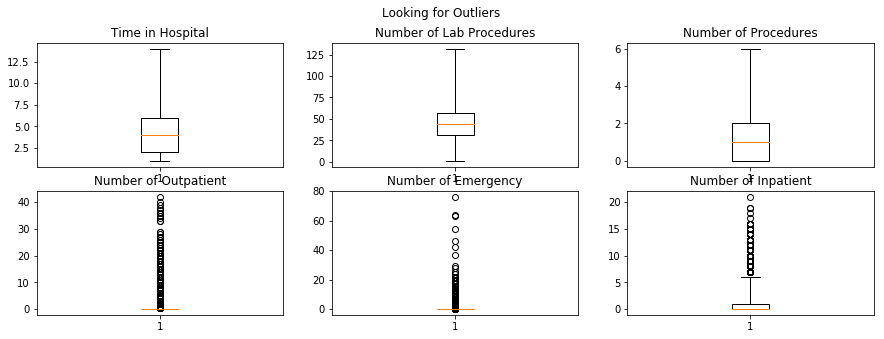

In [18]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(df3['number_outpatient'], whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(df3['number_emergency'], whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(df3['number_inpatient'], whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Looking for Outliers')
plt.show()

# Winsorizing Outliers

In [19]:
winsorized_number_outpatient = winsorize(df3['number_outpatient'], (0, .05))
winsorized_number_emergency = winsorize(df3['number_emergency'], (0, .05))
winsorized_number_inpatient = winsorize(df3['number_inpatient'], (0, .05))

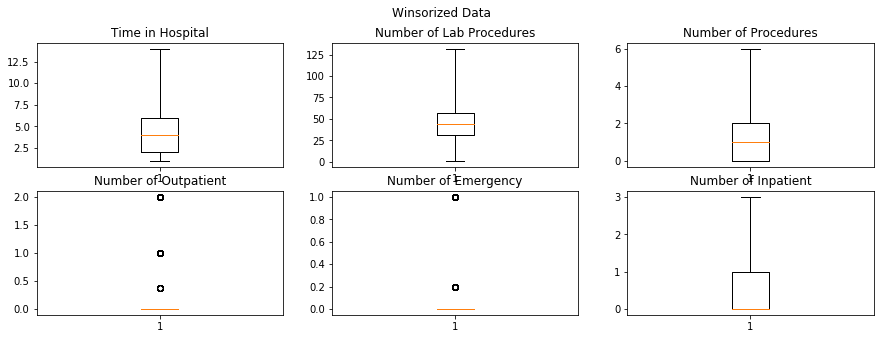

In [20]:
plt.figure(figsize = (15,5)) 

plt.subplot(2,3,1)
plt.boxplot(df3['time_in_hospital'], whis = 5)
plt.title('Time in Hospital')

plt.subplot(2,3,2)
plt.boxplot(df3['num_lab_procedures'], whis = 5)
plt.title('Number of Lab Procedures')

plt.subplot(2,3,3)
plt.boxplot(df3['num_procedures'], whis = 5)
plt.title('Number of Procedures')

plt.subplot(2,3,4)
plt.boxplot(winsorized_number_outpatient, whis = 5)
plt.title('Number of Outpatient')

plt.subplot(2,3,5)
plt.boxplot(winsorized_number_emergency, whis = 5)
plt.title('Number of Emergency')

plt.subplot(2,3,6)
plt.boxplot(winsorized_number_inpatient, whis = 5)
plt.title('Number of Inpatient')

plt.suptitle('Winsorized Data')
plt.show()

# Create df for numeric values

In [21]:
df_cat = df2.drop(columns = ['time_in_hospital','num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient'])

In [22]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 39 columns):
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
admission_type_id           101748 non-null float64
discharge_disposition_id    101687 non-null float64
admission_source_id         101705 non-null float64
num_medications             101731 non-null float64
diag_1                      101745 non-null object
diag_2                      101408 non-null object
diag_3                      100343 non-null object
number_diagnoses            101691 non-null float64
max_glu_serum               101766 non-null object
A1Cresult                   101766 non-null object
metformin                   101766 non-null object
repaglinide                 101766 non-null object
nateglinide                 101766 non-null object
chlorpropamide              101766 non-null object
glimepiride       

In [23]:
for col in df_cat[df_cat.describe().columns]:
    mode = df_cat[col].mode()
    df_cat[col] = df_cat[col].fillna(mode)

In [24]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Try using multiple methods on the same data. How do your results differ depending on the order you do them?

1) It makes sense to use mean for imputation of numeric values

2) Depending on the categorical values, we could use mode for imputation

3) Separate the data in multiple dataframes based on numberical and categorical data then use the appropriate method for cleaning the data and then imputating the cleaned data. Finally, we can concantenate the cleaned dataframes into one dataframe and perform the respective analysis.

## Create Binary Column for Readmission 

In [25]:
df_cat['readmitted_binary'] = df_cat['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

In [26]:
df_cat.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,num_medications,diag_1,diag_2,diag_3,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,250.83,NaN,NaN,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,18.0,276,250.01,255,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,13.0,648,250,V27,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),1.0,1.0,7.0,16.0,8,250.43,403,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),1.0,1.0,7.0,8.0,197,157,250,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


## Determine Relationship between Race and Readmission

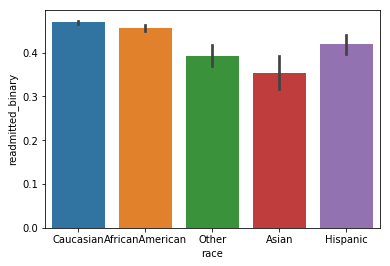

In [27]:
sns.barplot(x= 'race', y ='readmitted_binary', data = df_cat)

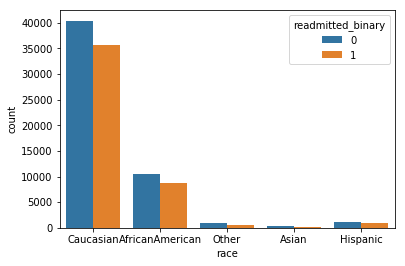

In [28]:
sns.countplot('race', hue = 'readmitted_binary', data = df_cat)

In [29]:
count_table = pd.crosstab(df_cat['readmitted_binary'], df_cat['race'])
count_table

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other
readmitted_binary,,,,,
0,10421,415,40383,1183,915
1,8789,226,35716,854,591


In [30]:
stats.chisquare(count_table, axis = None)

Power_divergenceResult(statistic=211664.74165016637, pvalue=0.0)

In [31]:
type(count_table)

pandas.core.frame.DataFrame

**Conclusion:** Race has an impact on readmission rates

## Determine Relationship between Gender and Readmission

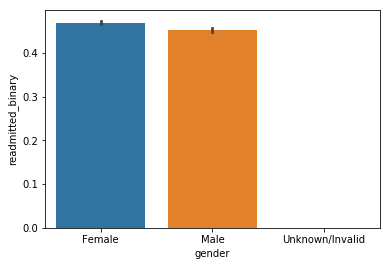

In [32]:
sns.barplot(x= 'gender', y ='readmitted_binary', data = df_cat)

In [33]:
count_table1 = pd.crosstab(df_cat['readmitted_binary'], df_cat['gender'])
count_table1

gender,Female,Male,Unknown/Invalid
readmitted_binary,,,
0,29038,25823,3
1,25670,21232,0


In [34]:
stats.chisquare(count_table1, axis = None)

Power_divergenceResult(statistic=52693.023996226635, pvalue=0.0)

**Conclusion:** Gender has an impact on readmission rates

## Determine Relationship between Insulin and Readmission

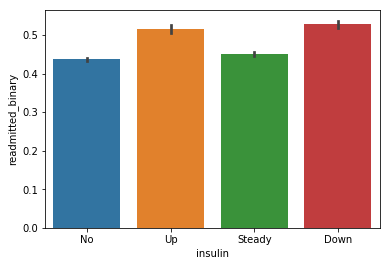

In [35]:
sns.barplot(x= 'insulin', y ='readmitted_binary', data = df_cat)

In [36]:
count_table2 = pd.crosstab(df_cat['readmitted_binary'], df_cat['insulin'])
count_table2

insulin,Down,No,Steady,Up
readmitted_binary,,,,
0,5768,26678,16934,5484
1,6450,20705,13915,5832


In [37]:
stats.chisquare(count_table2, axis = None)

Power_divergenceResult(statistic=36571.68402020321, pvalue=0.0)

## Adding Readmitted Binary into DF2

In [38]:
df2['readmitted_binary'] = df2['readmitted'].apply(lambda x: 0 if x=='NO' else 1)

## Determine Relationship between Time in Hospital and Readmission

ValueError: max must be larger than min in range parameter.

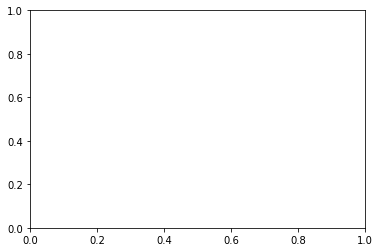

In [39]:
# plt.hist(df2['time_in_hospital'])

In [40]:
admitted_time = df2.loc[df2['readmitted_binary']==0, 'time_in_hospital'] 
not_admitted_time = df2.loc[df2['readmitted_binary']==1, 'time_in_hospital']

In [41]:
age_list=df2['age'].unique()

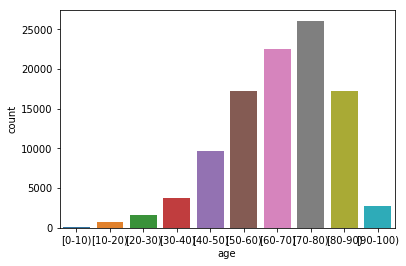

In [42]:
sns.countplot(df2['age'])

In [43]:
age_dic={}
for i in range(len(age_list)):
    age_dic[age_list[i]]=i


df2['age_rank'] = df['age'].map(age_dic)

In [44]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,No,No,No,No,Ch,Yes,NO,0,4


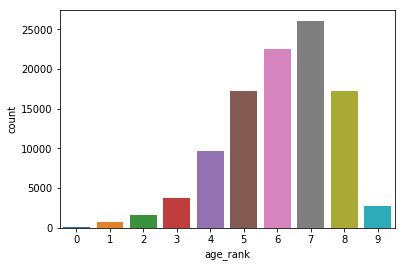

In [45]:
sns.countplot(df2['age_rank'])

In [46]:
df_num = df2.select_dtypes(include='number').copy()

In [47]:
df_num.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
0,6.0,25.0,1.0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
1,1.0,1.0,7.0,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1,1
2,1.0,1.0,7.0,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,0,2
3,1.0,1.0,7.0,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,0,3
4,1.0,1.0,7.0,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0,4


In [48]:
df_num.drop(['admission_type_id','discharge_disposition_id','admission_source_id','readmitted_binary','age_rank'], axis=1, inplace=True);

In [49]:
df_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0


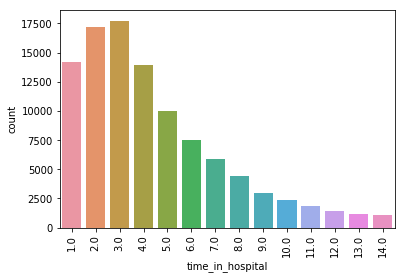

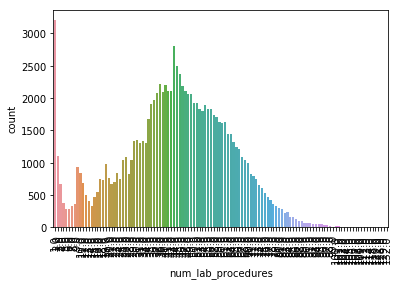

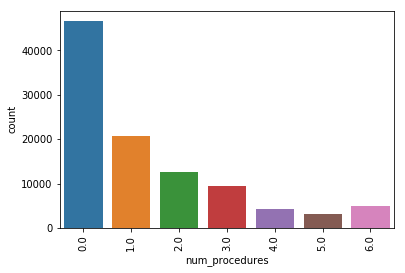

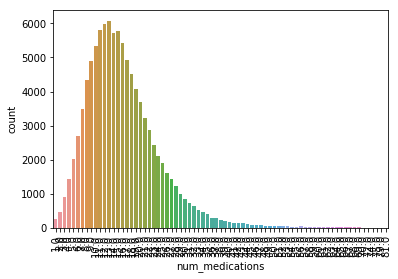

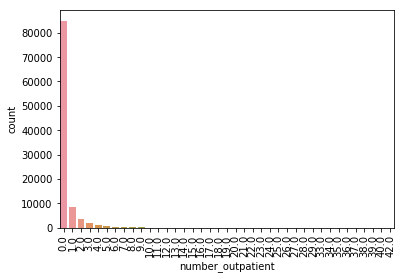

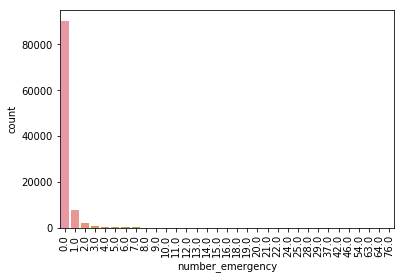

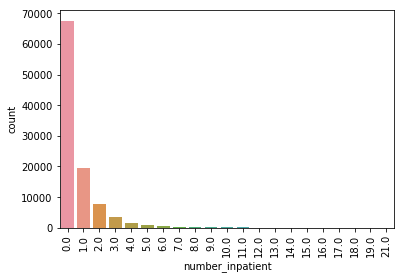

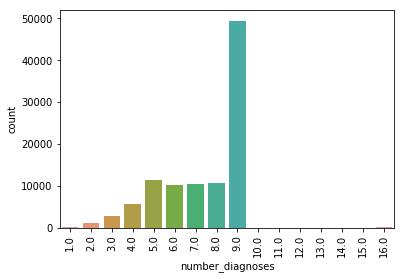

In [50]:
for name in df_num.columns:
    sns.countplot(df_num[name])
    plt.xticks(rotation=90)
    plt.show()
    

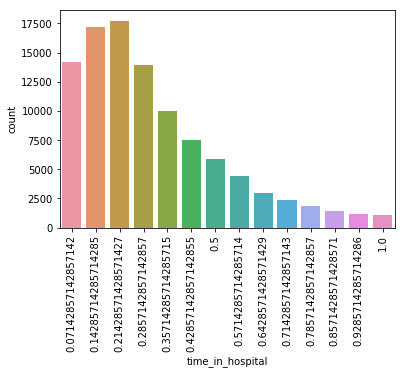

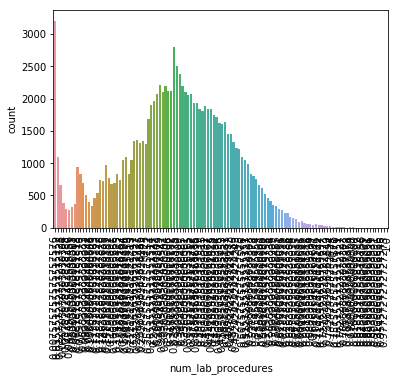

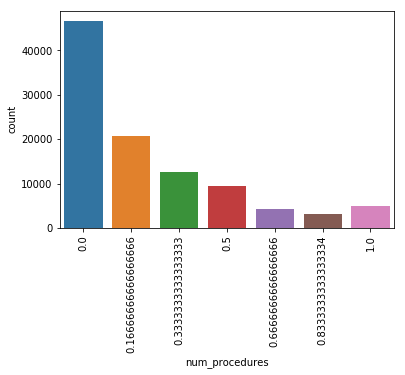

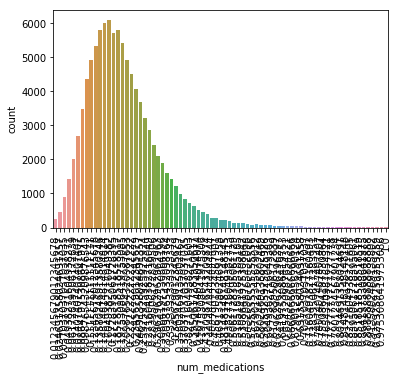

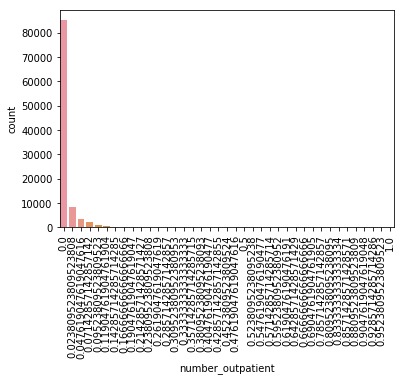

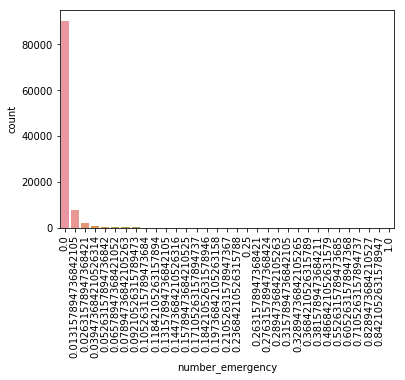

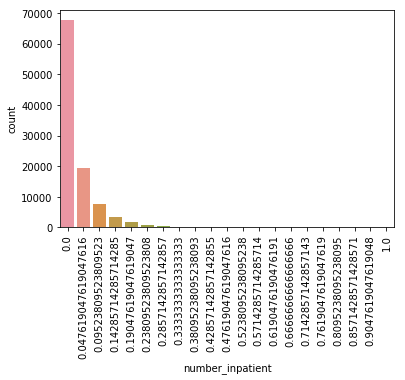

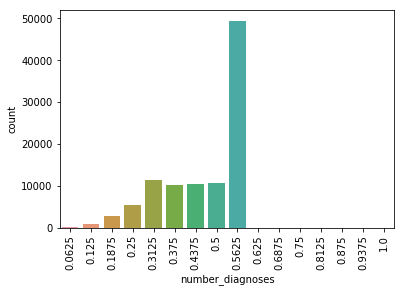

In [51]:
# scale to max
for name in df_num.columns:
    sns.countplot(df_num[name]/df_num[name].max()  )
    plt.xticks(rotation =90)
    plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler= StandardScaler()

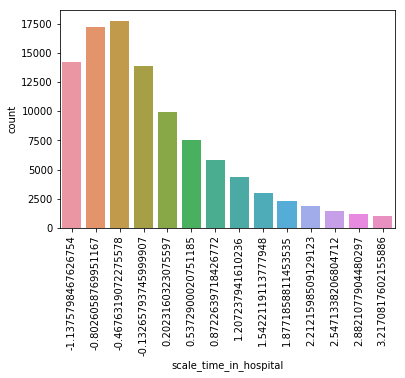

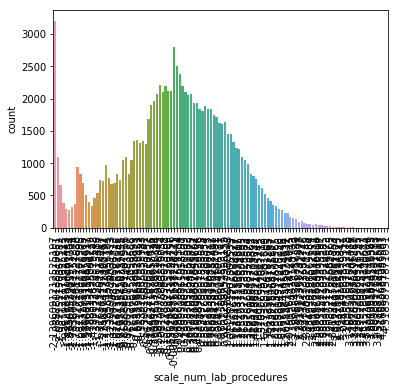

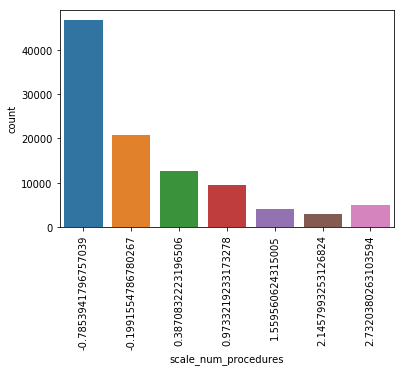

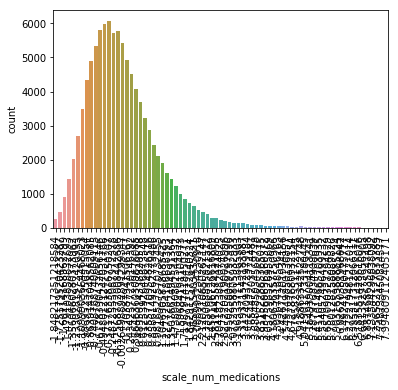

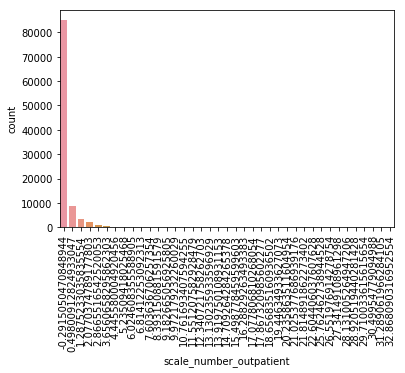

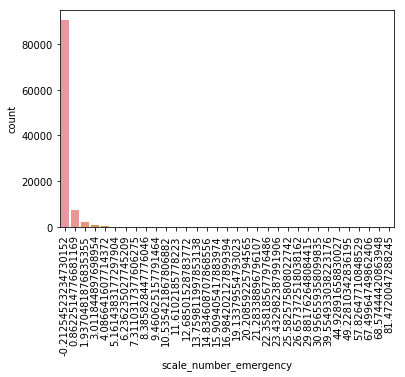

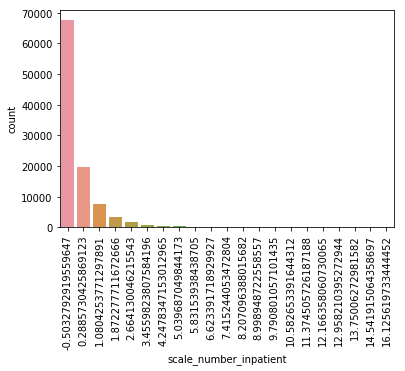

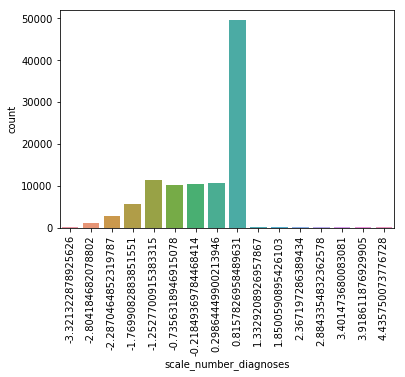

In [54]:
for name in df_num.columns:
    df_num['scale_'+name]=scaler.fit_transform(df_num[[name]])
    sns.countplot(df_num['scale_'+name])
    plt.xticks(rotation =90)
    plt.show()

## Combining two problematic features

Number of diagnoses and age group

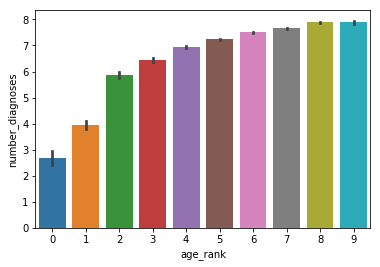

In [55]:
sns.barplot(data = df2, x= 'age_rank', y= 'number_diagnoses')

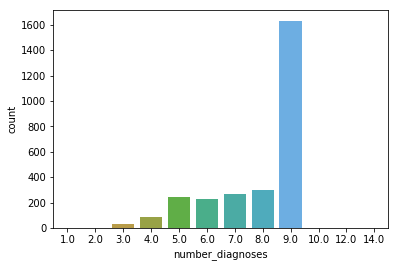

In [56]:
#Frequency of number of diagnoses for age group 9
sns.countplot(df2.loc[df2['age_rank']==9, 'number_diagnoses'])

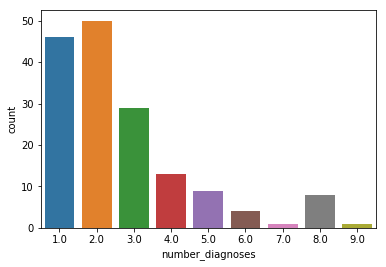

In [57]:
#Frequency of number of diagnoses for age group 0
sns.countplot(df2.loc[df2['age_rank']==0, 'number_diagnoses'])

In [58]:
df2.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted_binary,age_rank
admission_type_id,1.000000,0.083672,0.106657,-0.012452,-0.143929,0.129865,0.079502,0.026405,-0.019064,-0.038178,-0.117103,-0.004854,-0.007198
discharge_disposition_id,0.083672,1.000000,0.018173,0.162781,0.023431,0.015869,0.108660,-0.008753,-0.024430,0.020752,0.046862,-0.014920,0.114315
admission_source_id,0.106657,0.018173,1.000000,-0.007023,0.048849,-0.135334,-0.054582,0.027220,0.059968,0.036305,0.072107,0.040052,0.044781
time_in_hospital,-0.012452,0.162781,-0.007023,1.000000,0.318312,0.191583,0.466245,-0.008874,-0.009834,0.073656,0.220313,0.051258,0.107516
num_lab_procedures,-0.143929,0.023431,0.048849,0.318312,1.000000,0.057937,0.268167,-0.007317,-0.002531,0.039237,0.152689,0.039143,0.020694
num_procedures,0.129865,0.015869,-0.135334,0.191583,0.057937,1.000000,0.385710,-0.024781,-0.038232,-0.066238,0.073744,-0.044742,-0.030075
num_medications,0.079502,0.108660,-0.054582,0.466245,0.268167,0.385710,1.000000,0.045313,0.013102,0.064276,0.261422,0.046789,0.041824
number_outpatient,0.026405,-0.008753,0.027220,-0.008874,-0.007317,-0.024781,0.045313,1.000000,0.091616,0.107261,0.094371,0.082073,0.023629
number_emergency,-0.019064,-0.024430,0.059968,-0.009834,-0.002531,-0.038232,0.013102,0.091616,1.000000,0.266605,0.055326,0.102911,-0.087043
number_inpatient,-0.038178,0.020752,0.036305,0.073656,0.039237,-0.066238,0.064276,0.107261,0.266605,1.000000,0.104663,0.217191,-0.042864


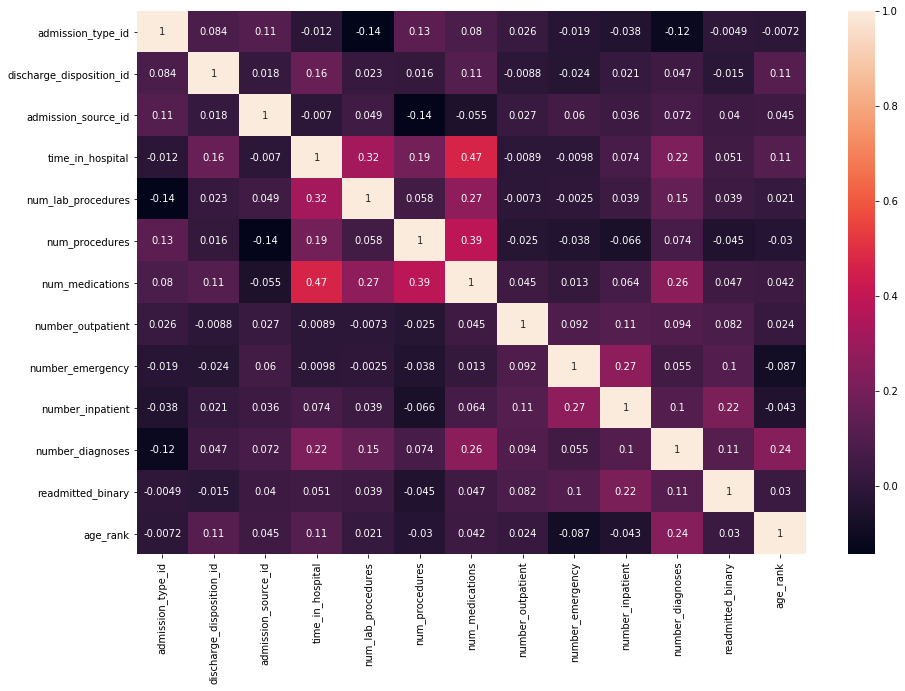

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(),annot=True)

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif

In [61]:
df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_binary', 'age_rank'],
      dtype='object')

In [62]:
df2 = df2.fillna(0)
Y=df2['readmitted_binary']
X=df2.drop(columns=['race', 'gender', 'age','diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted','readmitted_binary'], axis=1)

In [63]:
k  = 5
kbest = SelectKBest(k=k, score_func= f_classif)
X_best_feature = kbest.fit_transform(X,Y)


In [64]:
X_best_feature = pd.DataFrame(X_best_feature, columns = X.columns[kbest.get_support()])

In [65]:
X_best_feature.columns

Index(['time_in_hospital', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient'],
      dtype='object')

In [66]:
X_best_feature.head()

,time_in_hospital,num_medications,number_outpatient,number_emergency,number_inpatient
0,1.0,1.0,0.0,0.0,0.0
1,3.0,18.0,0.0,0.0,0.0
2,2.0,13.0,2.0,0.0,1.0
3,2.0,16.0,0.0,0.0,0.0
4,1.0,8.0,0.0,0.0,0.0


In [67]:
kbest.scores_

array([2.38889503e+00, 2.24059172e+01, 1.63242405e+02, 2.67566687e+02,
       1.55342949e+02, 2.03986679e+02, 2.23693622e+02, 6.90077148e+02,
       1.08786741e+03, 5.03822517e+03, 9.41519557e+01])

In [68]:
pd.Series(kbest.scores_, index=X.columns)

admission_type_id              2.388895
discharge_disposition_id      22.405917
admission_source_id          163.242405
time_in_hospital             267.566687
num_lab_procedures           155.342949
num_procedures               203.986679
num_medications              223.693622
number_outpatient            690.077148
number_emergency            1087.867407
number_inpatient            5038.225175
age_rank                      94.151956
dtype: float64

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components =11)
X_pca =pca.fit_transform(X)
cov = np.cov(X_pca.T)

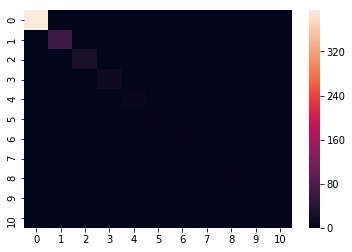

In [71]:
sns.heatmap(cov)

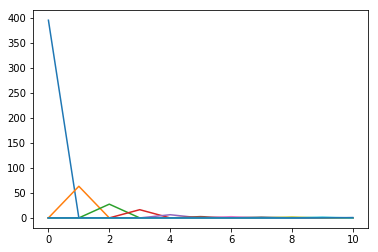

In [72]:
plt.plot(cov);

# Model performance
* Go back to your diabetes data set, and create a logistic regression model

* Evaluate your model, using cross validation and train-test splitting

* Use each of the metrics we went over

* Create a confusion matrix and an ROC curve

* Vary your hyperparameters and see the results on your metrics


In [73]:
# all imports in one place for convenience
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
%matplotlib inline

In [74]:
df2.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary,age_rank
0,Caucasian,Female,[0-10),6.0,25.0,1.0,1.0,41.0,0.0,1.0,...,No,No,No,No,No,No,No,NO,0,0
1,Caucasian,Female,[10-20),1.0,1.0,7.0,3.0,59.0,0.0,18.0,...,No,No,No,No,No,Ch,Yes,>30,1,1
2,AfricanAmerican,Female,[20-30),1.0,1.0,7.0,2.0,11.0,5.0,13.0,...,No,No,No,No,No,No,Yes,NO,0,2
3,Caucasian,Male,[30-40),1.0,1.0,7.0,2.0,44.0,1.0,16.0,...,No,No,No,No,No,Ch,Yes,NO,0,3
4,Caucasian,Male,[40-50),1.0,1.0,7.0,1.0,51.0,0.0,8.0,...,No,No,No,No,No,Ch,Yes,NO,0,4


In [75]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


In [76]:
y = df2['readmitted_binary']
X=df2
X.drop(['readmitted_binary','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
X= X.select_dtypes(include=numerics)
X1 = df2[X_best_feature.columns]

In [77]:
X_train, X_test, y_train, y_test  =  train_test_split(X1, y, random_state = 1)

In [78]:
lr = LogisticRegression(solver='sag', penalty = 'l2')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.6162644446191338

In [79]:
X_train.shape, y_test.shape

((76324, 5), (25442,))

In [80]:
predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[ 4010  7606]
 [ 2157 11669]]


In [81]:
df2['glimepiride-pioglitazone'].unique()

array(['No', 'Steady'], dtype=object)

In [82]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train, y_train)

lr_score = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('Accuracy of Logistic Regression: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression: 0.616


In [83]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=10000)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.6091923903359363
Score on test data:  0.6163037497052118


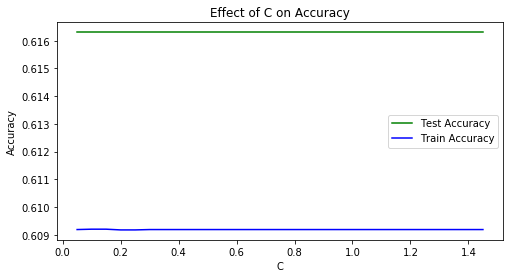

In [84]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

In [85]:
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.543432120116343

#Confusion Matrix

In [86]:

predictions = lr.predict(X_test)

confusion = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion)

[[ 4011  7605]
 [ 2157 11669]]


In [87]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

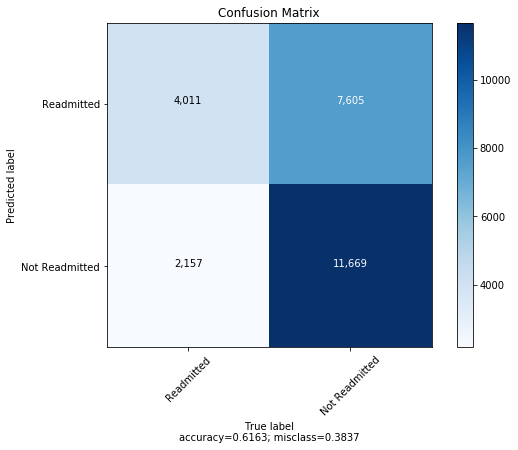

In [88]:
plot_confusion_matrix(cm=confusion, target_names = ['Readmitted', 'Not Readmitted'], title = 'Confusion Matrix',normalize=False)
sns.set()

In [89]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
fbeta_precision = fbeta_score(y_test, predictions, 0.5)
fbeta_recall = fbeta_score(y_test, predictions, 2)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))
print('Fbeta score favoring precision: {:.2f}'.format(fbeta_precision))
print('FBeta score favoring recall: {:.2f}'.format(fbeta_recall))

Accuracy score: 0.62
Precision score: 0.65
Recall score: 0.35
F1 score: 0.45
Fbeta score favoring precision: 0.55
FBeta score favoring recall: 0.38


In [90]:
report = classification_report(y_test, predictions, target_names=['Not Readmitted', 'Readmitted'])
print(report)

                precision    recall  f1-score   support

Not Readmitted       0.61      0.84      0.71     13826
    Readmitted       0.65      0.35      0.45     11616

     micro avg       0.62      0.62      0.62     25442
     macro avg       0.63      0.59      0.58     25442
  weighted avg       0.63      0.62      0.59     25442



In [91]:
dummy_report = classification_report(y_test, dummy.predict(X_test), target_names=['Not Readmitted', 'Readmitted'])
print(dummy_report)

                precision    recall  f1-score   support

Not Readmitted       0.54      1.00      0.70     13826
    Readmitted       0.00      0.00      0.00     11616

     micro avg       0.54      0.54      0.54     25442
     macro avg       0.27      0.50      0.35     25442
  weighted avg       0.30      0.54      0.38     25442



#Decision Function - Varying the Probability Threshold

In [92]:
probs = lr.predict_proba(X_test)[:, 1]
print(probs[1:30])

[0.46907462 0.61232837 0.37491433 0.47911522 0.36490406 0.57457042
 0.63430931 0.40452543 0.38021222 0.78448624 0.41582619 0.5846221
 0.48299978 0.38706578 0.38630201 0.36789462 0.39128007 0.75718254
 0.49691004 0.41413094 0.47884474 0.37566938 0.58951789 0.41721966
 0.38770146 0.62366174 0.40931953 0.67627476 0.38185912]


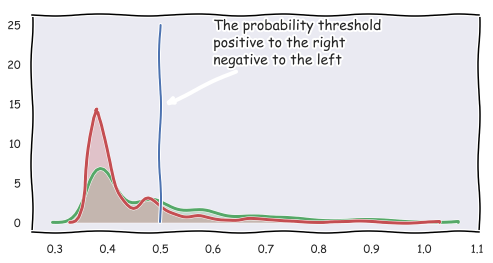

In [93]:
pos = [i for i, j in zip(probs, y_test) if j == 1]
neg = [i for i, j in zip(probs, y_test) if j == 0]

with plt.xkcd():
  fig = plt.figure(figsize=(8, 4))

  sns.distplot(pos, hist = False, kde = True, color='g',
                 kde_kws = {'shade': True, 'linewidth': 3})

  sns.distplot(neg, hist = False, kde = True, color='r',
                 kde_kws = {'shade': True, 'linewidth': 3})

  plt.plot([0.5, 0.5], [0, 25], '-b')
  plt.annotate(
        'The probability threshold\npositive to the right\nnegative to the left',
        xy=(0.51, 15), arrowprops=dict(arrowstyle='->'), xytext=(0.6, 20))

plt.show()

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
print(fpr[1:30])
print(tpr[1:30])
print(thresholds[1:30])

[0.00000000e+00 0.00000000e+00 7.23274989e-05 7.23274989e-05
 1.44654998e-04 1.44654998e-04 2.16982497e-04 2.16982497e-04
 2.89309996e-04 2.89309996e-04 4.33964993e-04 4.33964993e-04
 5.06292492e-04 5.06292492e-04 5.78619991e-04 5.78619991e-04
 6.50947490e-04 6.50947490e-04 7.23274989e-04 7.23274989e-04
 7.95602488e-04 7.95602488e-04 8.67929987e-04 8.67929987e-04
 8.67929987e-04 8.67929987e-04 9.40257486e-04 9.40257486e-04
 1.08491248e-03]
[8.60881543e-05 1.29132231e-03 1.29132231e-03 1.98002755e-03
 1.98002755e-03 2.32438017e-03 2.32438017e-03 4.73484848e-03
 4.73484848e-03 5.85399449e-03 5.85399449e-03 6.02617080e-03
 6.02617080e-03 6.28443526e-03 6.28443526e-03 6.37052342e-03
 6.37052342e-03 6.45661157e-03 6.45661157e-03 7.74793388e-03
 7.74793388e-03 8.43663912e-03 8.43663912e-03 8.52272727e-03
 8.69490358e-03 1.06749311e-02 1.06749311e-02 1.08471074e-02
 1.08471074e-02]
[0.99999986 0.99724822 0.99704761 0.99517838 0.99505191 0.99445255
 0.9944365  0.98462348 0.98458503 0.9785208  

#ROC curve

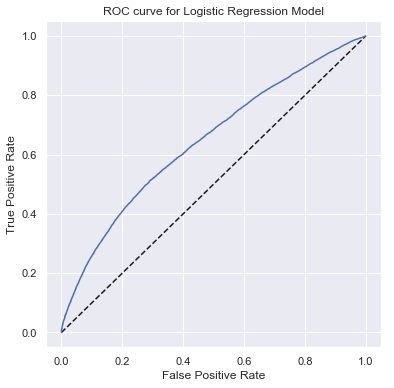

In [95]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

#Precision-Recall Curve

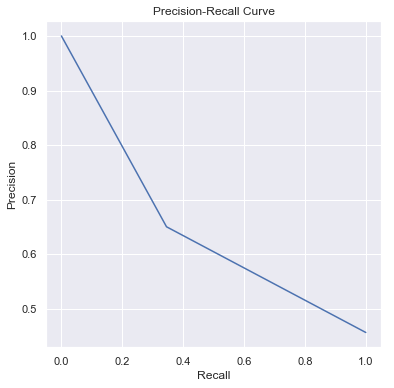

In [96]:
pres, rec, thresholds = precision_recall_curve(y_test, predictions)
fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#Area under the ROC curve (AUC)

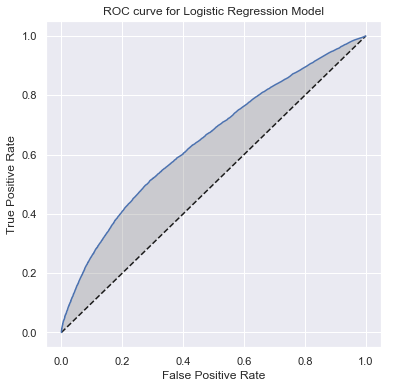

In [97]:
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

In [109]:
y1 = df2['readmitted']
X=df2
X = X.drop(['readmitted_binary','readmitted','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
X= X.select_dtypes(include=numerics)
X1 = df2[X_best_feature.columns]

In [110]:
y1.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [112]:
X.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,age_rank
0,1.0,41.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,3.0,59.0,0.0,18.0,0.0,0.0,0.0,9.0,1
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,6.0,2
3,2.0,44.0,1.0,16.0,0.0,0.0,0.0,7.0,3
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,4


In [113]:
from sklearn.ensemble import RandomForestClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1)


d_rf_clf = RandomForestClassifier(n_estimators=24)
d_rf_clf.fit(X1_train, y1_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
# first generate predictions on the test data
d_predictions = d_rf_clf.predict(X1_test)
d_report = classification_report(y1_test, d_predictions)
print(d_report)

              precision    recall  f1-score   support

         <30       0.17      0.06      0.09      2847
         >30       0.41      0.40      0.40      8776
          NO       0.60      0.69      0.64     13819

   micro avg       0.52      0.52      0.52     25442
   macro avg       0.39      0.38      0.38     25442
weighted avg       0.48      0.52      0.50     25442



In [115]:
# Using ovr
d_ovr_lr_clf = LogisticRegression(solver='lbfgs', multi_class='ovr')
d_ovr_lr_clf.fit(X1_train, y1_train)
d_ovr_proba = d_ovr_lr_clf.predict_proba(X1_test)

# Just look at the first instance
d_ovr_proba[0:1]

array([[0.09901629, 0.35238649, 0.54859722]])

In [116]:
# using multinomial
d_multinomial_lr_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
d_multinomial_lr_clf.fit(X1_train, y1_train)
d_multinomial_proba = d_multinomial_lr_clf.predict_proba(X1_test)

# Just look at the first instance
d_multinomial_proba[0:1]

array([[0.08137783, 0.40603867, 0.5125835 ]])

In [121]:
confusion1 = confusion_matrix(y1_test, d_ovr_lr_clf.predict(X1_test))
print(confusion1)

[[    3   723  2121]
 [    4  1788  6984]
 [    1  1095 12723]]


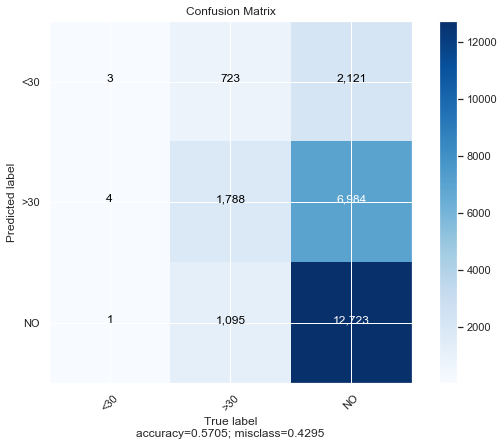

In [122]:
plot_confusion_matrix(cm=confusion1, target_names = ['<30', '>30', 'NO'], title = 'Confusion Matrix',normalize=False)